## Regression
Teori som bliver gennemgået på klassen - [**Notion Regression**](https://www.notion.so/mercantec/Machine-Learning-e89a2baf0d414172b13d07465366482e?pvs=4#cceeafe8d5b9432d8709b1329caf6969)

## Simpel lineær regression med syntetiske data

I denne første del vil vi udforske lineær regression med en simpel database.


### Læringsmål:

Efter at have udført denne øvelse vil du vide, hvordan du gør følgende:

  * Tilpas følgende [hyperparametre](https://developers.google.com/machine-learning/glossary/#hyperparameter):
    * [læringsrate](https://developers.google.com/machine-learning/glossary/#learning_rate)
    * antal [epoker](https://developers.google.com/machine-learning/glossary/#epoch)
    * [batchstørrelse](https://developers.google.com/machine-learning/glossary/#batch_size)
  * Tolker forskellige typer af [loss curves](https://developers.google.com/machine-learning/glossary/#loss_curve).

### Importér relevante moduler

Den følgende celle importerer de pakker, som programmet kræver:


In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt


## Definér funktioner, der opbygger og træner en model

Den følgende kode definerer to funktioner:

  * `build_model(my_learning_rate)`, som opbygger en tom model.
  * `train_model(model, feature, label, epochs)`, som træner modellen ud fra de eksempler (feature og label), du passerer.

Da du ikke behøver at forstå modelopbygningskoden lige nu, har vi skjult denne kodecelle. Du kan valgfrit dobbeltklikke på overskriften for at udforske denne kode.


In [8]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))

  # Compile the model topography into code that
  # TensorFlow can efficiently execute. Configure
  # training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the
  # model. The model will train for the specified number
  # of epochs, gradually learning how the feature values
  # relate to the label values.
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the
  # rest of history.
  epochs = history.epoch

  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean
  # squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


### Definér plotningsfunktioner

Vi bruger en populær Python-bibliotek kaldet [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) til at oprette følgende to plot:

* et plot af funktionens værdier vs. etiketværdierne og en linje, der viser output af den trænede model.
* en [tabkurve](https://developers.google.com/machine-learning/glossary/#loss_curve).

Vi har skjult den følgende kodecelle, fordi det ikke er relevant at lære Matplotlib i forhold til læringsmålene. Uanset det skal du stadig køre alle skjulte kodeceller.

In [13]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (np.average(trained_weight) * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


### Definér datasættet

Datasættet består af 12 [eksempler](https://developers.google.com/machine-learning/glossary/#example). Hvert eksempel består af en [feature](https://developers.google.com/machine-learning/glossary/#feature) og en [label](https://developers.google.com/machine-learning/glossary/#label).


In [25]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

### Angiv hyperparametrene

Hyperparametrene i denne Colab er som følger:

  * [læringsrate - learning_rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
  * [batch_size](https://developers.google.com/machine-learning/glossary/#batch_size)

Den følgende kodecelle initialiserer disse hyperparametre og kalder derefter funktionerne, der opbygger og træner modellen.

Epoch 1/10
1/1 [==============================] - 0s 166ms/step - loss: 225.9847 - root_mean_squared_error: 15.0328
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 218.2189 - root_mean_squared_error: 14.7722
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 212.7164 - root_mean_squared_error: 14.5848
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 208.1863 - root_mean_squared_error: 14.4287
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 204.2212 - root_mean_squared_error: 14.2906
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 200.6327 - root_mean_squared_error: 14.1645
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 197.3159 - root_mean_squared_error: 14.0469
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 194.2058 - root_mean_squared_error: 13.9358
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 191.2590 - root_

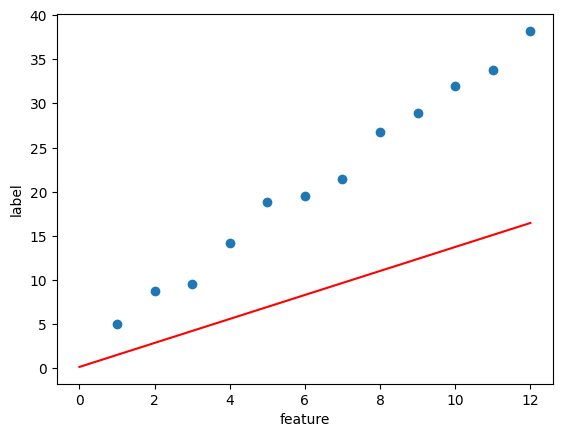

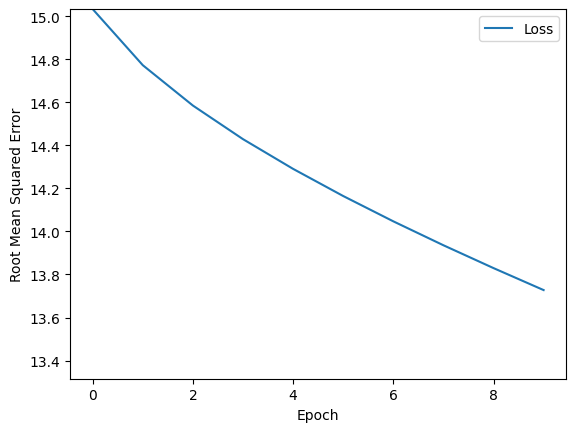

In [53]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

### Opgave 1: Undersøg graferne

Undersøg den øverste graf. De blå prikker identificerer de faktiske data, mens den røde linje identificerer output fra den trænede model. Ideelt set bør den røde linje justere sig pænt med de blå prikker. Gør den det?

En vis grad af tilfældighed spiller ind i træningen af en model, så du vil få lidt forskellige resultater hver gang du træner. Det sagt, medmindre du er en ekstremt heldig person, så passer den røde linje sandsynligvis *ikke* pænt med de blå prikker.

Undersøg den nederste graf, som viser tabkurven. Bemærk, at tabkurven falder, men ikke flader ud, hvilket er et tegn på, at modellen ikke er tilstrækkeligt trænet.

Hvad kan have effekt på hvor godt modellen er trænet?

### Opgave 2: Øg antallet af epoker

Træningstabet bør gradvist falde, først stejlt og derefter langsommere. Til sidst bør træningstab forblive stabilt (nul hældning eller næsten nul hældning), hvilket indikerer, at træningen har [konvergeret](http://developers.google.com/machine-learning/glossary/#convergence).

I Opgave 1 konvergerede træningstab ikke. En mulig løsning er at øge antallet af epoker tilstrækkeligt for at få modellen til at konvergere. Det er imidlertid ineffektivt at træne ud over konvergenspunktet, så indstil ikke bare antallet af epoker til en vilkårligt høj værdi.

Undersøg tabkurven. Konvergerer modellen?

Epoch 1/350
1/1 [==============================] - 0s 161ms/step - loss: 416.5778 - root_mean_squared_error: 20.4102
Epoch 2/350
1/1 [==============================] - 0s 5ms/step - loss: 405.9997 - root_mean_squared_error: 20.1494
Epoch 3/350
1/1 [==============================] - 0s 6ms/step - loss: 398.4571 - root_mean_squared_error: 19.9614
Epoch 4/350
1/1 [==============================] - 0s 7ms/step - loss: 392.2192 - root_mean_squared_error: 19.8045
Epoch 5/350
1/1 [==============================] - 0s 6ms/step - loss: 386.7385 - root_mean_squared_error: 19.6657
Epoch 6/350
1/1 [==============================] - 0s 6ms/step - loss: 381.7614 - root_mean_squared_error: 19.5387
Epoch 7/350
1/1 [==============================] - 0s 5ms/step - loss: 377.1468 - root_mean_squared_error: 19.4203
Epoch 8/350
1/1 [==============================] - 0s 6ms/step - loss: 372.8071 - root_mean_squared_error: 19.3082
Epoch 9/350
1/1 [==============================] - 0s 8ms/step - loss: 368.683

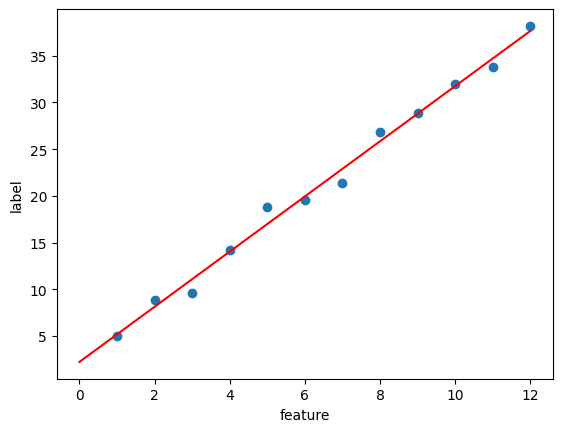

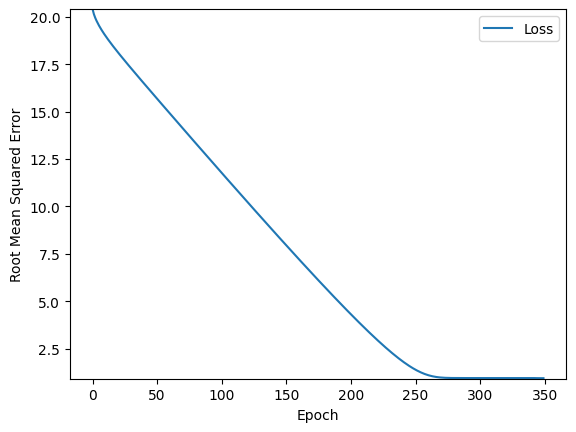

In [77]:
learning_rate=0.01
epochs= 350   # Replace ? with an integer.
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
#@title Double-click to view a possible solution
learning_rate=0.01
epochs=450
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

### Opgave 3: Forøg læringsraten

I Opgave 2 øgede du antallet af epoker for at få modellen til at konvergere. Nogle gange kan du få modellen til at konvergere hurtigere ved at øge læringsraten. Dog gør indstillingen af læringsraten for høj ofte det umuligt for en model at konvergere. I Opgave 3 har vi med vilje indstillet læringsraten for høj. Kør følgende kodecelle og se, hvad der sker.

Epoch 1/500
1/1 [==============================] - 0s 165ms/step - loss: 958.7377 - root_mean_squared_error: 30.9635
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 6656062.5000 - root_mean_squared_error: 2579.9346
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 948.2982 - root_mean_squared_error: 30.7945
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 5.5842 - root_mean_squared_error: 2.3631
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 1.4219 - root_mean_squared_error: 1.1924
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 1.3298 - root_mean_squared_error: 1.1532
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 1.2986 - root_mean_squared_error: 1.1396
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 1.2698 - root_mean_squared_error: 1.1269
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 1.2416 - root_me

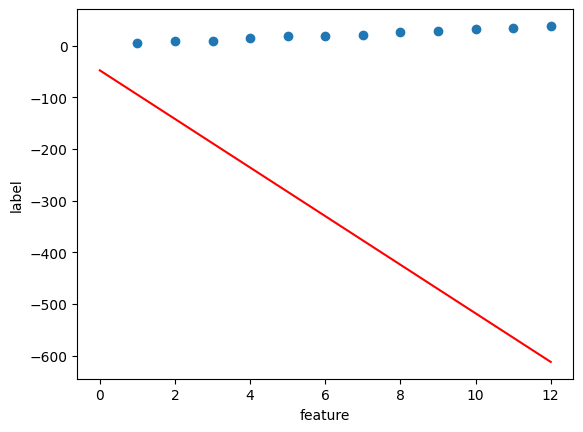

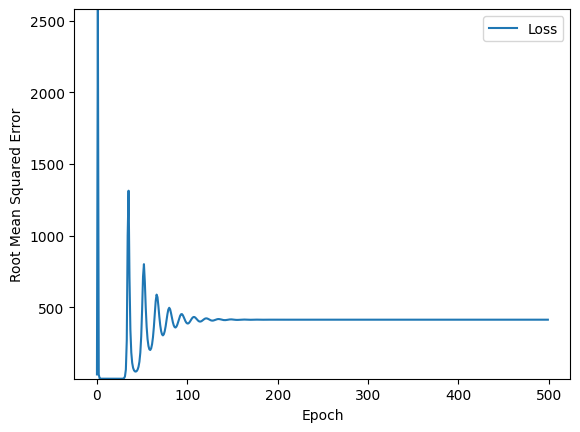

In [78]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100
epochs=500

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Den resulterende model er elendig; den røde linje justerer sig ikke med de blå prikker. Desuden svinger tabkurven som en [rutsjebane](https://www.wikipedia.org/wiki/Roller_coaster). En svingende tabkurve tyder kraftigt på, at læringsraten er for høj.


### Opgave 4: Find den ideelle kombination af epoker og læringsrate

Tildel værdier til følgende to hyperparametre for at få træningen til at konvergere så effektivt som muligt:

* Læringsrate (learning_rate)
* Epoker (epochs)


Epoch 1/25
1/1 [==============================] - 0s 167ms/step - loss: 452.1051 - root_mean_squared_error: 21.2628
Epoch 2/25
1/1 [==============================] - 0s 5ms/step - loss: 257.5375 - root_mean_squared_error: 16.0480
Epoch 3/25
1/1 [==============================] - 0s 6ms/step - loss: 163.9868 - root_mean_squared_error: 12.8057
Epoch 4/25
1/1 [==============================] - 0s 5ms/step - loss: 108.0434 - root_mean_squared_error: 10.3944
Epoch 5/25
1/1 [==============================] - 0s 5ms/step - loss: 71.9481 - root_mean_squared_error: 8.4822
Epoch 6/25
1/1 [==============================] - 0s 8ms/step - loss: 47.9040 - root_mean_squared_error: 6.9213
Epoch 7/25
1/1 [==============================] - 0s 5ms/step - loss: 31.7046 - root_mean_squared_error: 5.6307
Epoch 8/25
1/1 [==============================] - 0s 6ms/step - loss: 20.7968 - root_mean_squared_error: 4.5604
Epoch 9/25
1/1 [==============================] - 0s 5ms/step - loss: 13.5150 - root_mean_squa

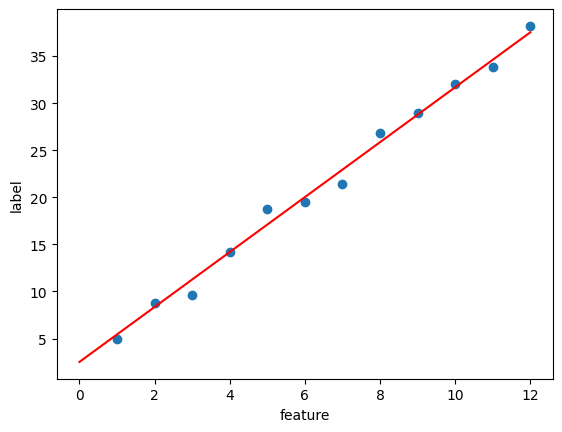

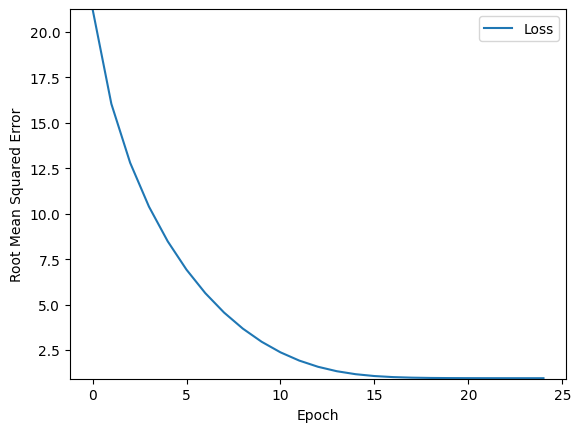

In [84]:
# Set the learning rate and number of epochs
learning_rate= 0.2  # Replace ? with a floating-point number
epochs= 25   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/70
1/1 [==============================] - 0s 167ms/step - loss: 1040.2836 - root_mean_squared_error: 32.2534
Epoch 2/70
1/1 [==============================] - 0s 6ms/step - loss: 818.0307 - root_mean_squared_error: 28.6012
Epoch 3/70
1/1 [==============================] - 0s 6ms/step - loss: 681.6296 - root_mean_squared_error: 26.1080
Epoch 4/70
1/1 [==============================] - 0s 6ms/step - loss: 580.9886 - root_mean_squared_error: 24.1037
Epoch 5/70
1/1 [==============================] - 0s 6ms/step - loss: 501.0398 - root_mean_squared_error: 22.3839
Epoch 6/70
1/1 [==============================] - 0s 6ms/step - loss: 434.9649 - root_mean_squared_error: 20.8558
Epoch 7/70
1/1 [==============================] - 0s 5ms/step - loss: 379.0196 - root_mean_squared_error: 19.4684
Epoch 8/70
1/1 [==============================] - 0s 5ms/step - loss: 330.8942 - root_mean_squared_error: 18.1905
Epoch 9/70
1/1 [==============================] - 0s 5ms/step - loss: 289.0476 - root

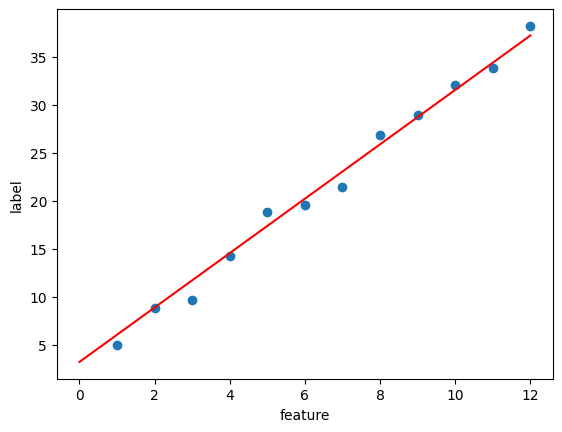

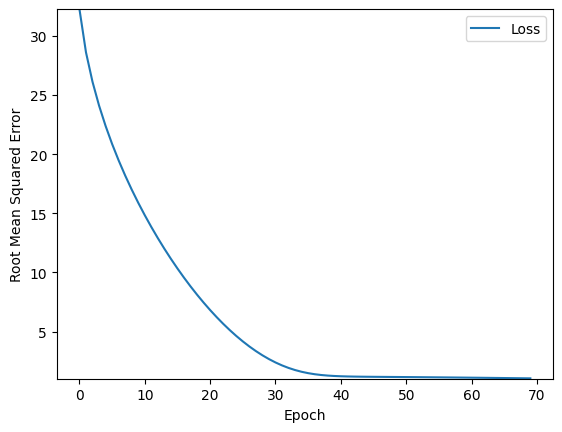

In [85]:
#@title Double-click to view a possible solution

learning_rate=0.14
epochs=70

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

### Opgave 5: Justér batchstørrelsen

Systemet genberegner modelens tabværdi og justerer modelens vægte og bias efter hver **iteration**. Hver iteration er det interval, hvor systemet behandler én batch. For eksempel, hvis **batchstørrelsen** er 6, genberegner systemet modelens tabværdi og justerer modelens vægte og bias efter at have behandlet hver 6 eksempler.

Én **epoke** dækker tilstrækkeligt mange iterationer til at behandle hver eneste eksempel i datasættet. For eksempel, hvis batchstørrelsen er 12, varer hver epoke én iteration. Men hvis batchstørrelsen er 6, kræver hver epoke to iterationer.

Det er fristende blot at indstille batchstørrelsen til antallet af eksempler i datasættet (12 i dette tilfælde). Dog kan modellen faktisk trænes hurtigere på mindre batches. Omvendt indeholder meget små batches måske ikke nok information til at hjælpe modellen med at konvergere.

Experimentér med `my_batch_size` i den følgende kodecelle. Hvad er det mindste heltal, du kan indstille for `my_batch_size` og stadig få modellen til at konvergere på hundrede epoker?


Epoch 1/100
12/12 [==============================] - 0s 1ms/step - loss: 1028.0426 - root_mean_squared_error: 32.0631
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 747.4355 - root_mean_squared_error: 27.3393
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 561.7151 - root_mean_squared_error: 23.7005
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 415.9576 - root_mean_squared_error: 20.3950
Epoch 5/100
12/12 [==============================] - 0s 953us/step - loss: 290.6978 - root_mean_squared_error: 17.0499
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 189.1533 - root_mean_squared_error: 13.7533
Epoch 7/100
12/12 [==============================] - 0s 909us/step - loss: 113.3058 - root_mean_squared_error: 10.6445
Epoch 8/100
12/12 [==============================] - 0s 940us/step - loss: 60.8633 - root_mean_squared_error: 7.8015
Epoch 9/100
12/12 [==============================] - 0s 1ms

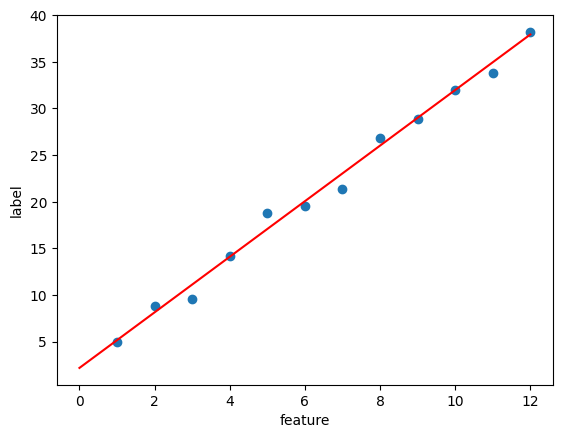

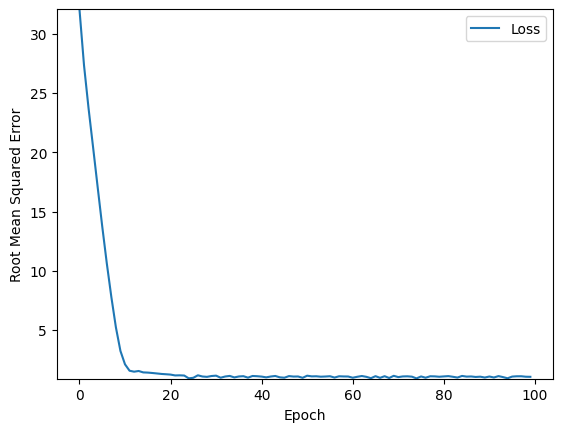

In [94]:
learning_rate=0.05
epochs=100
my_batch_size= 1  # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/100
12/12 [==============================] - 0s 1ms/step - loss: 928.8235 - root_mean_squared_error: 30.4766
Epoch 2/100
12/12 [==============================] - 0s 919us/step - loss: 682.2883 - root_mean_squared_error: 26.1206
Epoch 3/100
12/12 [==============================] - 0s 963us/step - loss: 495.1425 - root_mean_squared_error: 22.2518
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 348.5271 - root_mean_squared_error: 18.6689
Epoch 5/100
12/12 [==============================] - 0s 964us/step - loss: 240.1774 - root_mean_squared_error: 15.4977
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 155.1716 - root_mean_squared_error: 12.4568
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 88.4787 - root_mean_squared_error: 9.4063
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 44.7631 - root_mean_squared_error: 6.6905
Epoch 9/100
12/12 [==============================] - 0s 947us/

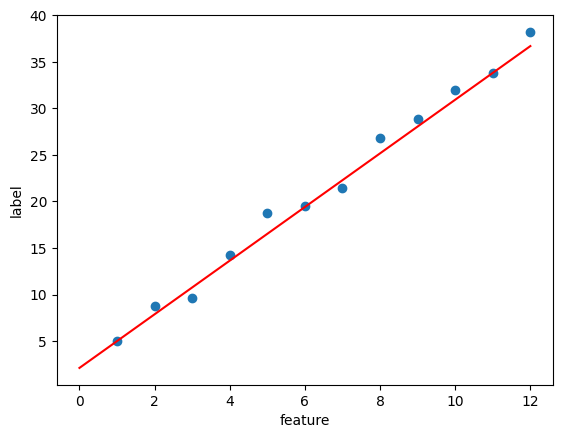

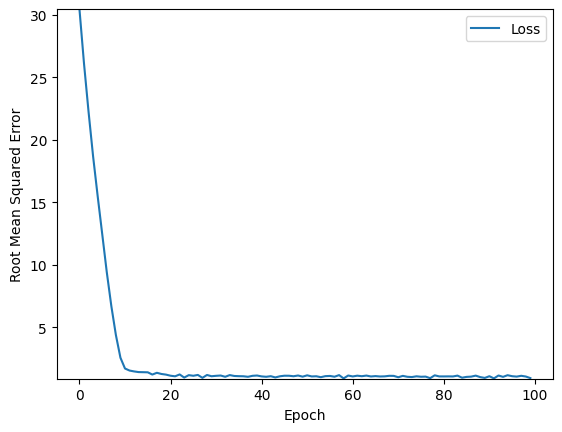

In [93]:
#@title Double-click to view a possible solution

learning_rate=0.05
epochs=100
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


## Sammenfatning af hyperparameter-tilpasning

De fleste maskinlæringsproblemer kræver en masse hyperparameter-tilpasning. Desværre kan vi ikke give konkrete retningslinjer for tilpasning til hver model. At sænke læringsraten kan hjælpe én model med at konvergere effektivt, men få en anden model til at konvergere alt for langsomt. Du skal eksperimentere for at finde den bedste sæt hyperparametre for dit datasæt. Med det sagt er her nogle tommelfingerregler:

* Træningstabet bør jævnt falde, først stejlt og derefter langsommere, indtil kurvens hældning når eller nærmer sig nul.
* Hvis træningstabet ikke konvergerer, så træn i flere epoker.
* Hvis træningstabet falder for langsomt, skal du øge læringsraten. Bemærk, at indstilling af læringsraten for høj også kan forhindre træningstab i at konvergere.
* Hvis træningstabet varierer vildt (dvs. træningstabet hopper rundt), så sænk læringsraten.
* At sænke læringsraten samtidig med at du øger antallet af epoker eller batchstørrelsen er ofte en god kombination.
* At indstille batchstørrelsen til et *meget* lille batchnummer kan også forårsage ustabilitet. Prøv først store batchstørrelsesværdier. Derefter skal du sænke batchstørrelsen, indtil du ser forringelse.
* For datasæt fra den virkelige verden, der består af et meget stort antal eksempler, kan hele datasættet muligvis ikke passe i hukommelsen. I sådanne tilfælde skal du reducere batchstørrelsen for at muliggøre, at en batch passer i hukommelsen.

Husk: den ideelle kombination af hyperparametre afhænger af data, så du skal altid eksperimentere og verificere.


## Linear Regression with a Real Dataset
   
Nu prøver vi at skifter over til et reelt datasæt med huspriser i Californien.





### Læringsmål:

Efter at have udført denne del vil du vide, hvordan man gør følgende:

  * Læse en .csv-fil ind i en [pandas](https://developers.google.com/machine-learning/glossary/#pandas) DataFrame.
  * Undersøge et stykke [datamateriale](https://developers.google.com/machine-learning/glossary/#data_set).
  * Eksperimentere med forskellige [funktioner](https://developers.google.com/machine-learning/glossary/#feature) i opbygningen af en model.
  * Finjustere modellens [hyperparametre](https://developers.google.com/machine-learning/glossary/#hyperparameter).


### Datamaterialet

[Datamaterialet til denne øvelse](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) er baseret på folketællingsdata fra 1990 i Californien. Datamaterialet er gammelt, men det giver stadig en fremragende mulighed for at lære om maskinlæringsprogrammering.

### Import relevante moduler

Det følgende kode er nødvendigt for at køre resten af denne filen!

In [95]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

### Datamaterialet

Datamateriale gemmes ofte på disken eller på en URL i [.csv-format](https://wikipedia.org/wiki/Comma-separated_values).

En velformet .csv-fil indeholder kolonnenavne i den første række, efterfulgt af mange rækker med data. Et komma deler hver værdi i hver række. Her er for eksempel de første fem rækker af .csv-filen, der indeholder Californien Boligdatamaterialet:

```
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000
```



### Indlæs .csv-filen i en pandas DataFrame

Denne Colab, ligesom mange maskinlæringsprogrammer, indsamler .csv-filen og gemmer dataene i hukommelsen som en pandas Dataframe. Pandas er en open source Python-bibliotek. Den primære datetype i pandas er en DataFrame. Du kan forestille dig en pandas DataFrame som en regneark, hvor hver række er identificeret med et nummer, og hver kolonne med et navn. Pandas er selv bygget på et andet open source Python-bibliotek kaldet NumPy. Hvis du ikke er fortrolig med disse teknologier, bedes du se disse to hurtige tutorials:

*   [NumPy](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/numpy_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=numpy_tf2-colab&hl=en)
*   [Pandas DataFrames](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en)

Den følgende kodecelle importerer .csv-filen i en pandas DataFrame og skalerer værdierne i labelen (`median_house_value`):


In [96]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


Skalering af `median_house_value` sætter værdien for hver bolig i tusinder af enheder. Skalering vil holde tabværdier og indlæringshastigheder i et mere venligt område.

Selvom skalering af en label normalt *ikke* er afgørende, er skalering af funktioner i en multifunktionsmodel normalt *afgørende*.

### Undersøg datamaterialet

En stor del af de fleste maskinlæringsprojekter handler om at lære dine data at kende. Pandas API giver en `describe`-funktion, der udskriver følgende statistik om hver kolonne i DataFrame:

* `count`, som er antallet af rækker i den pågældende kolonne. Ideelt set indeholder `count` samme værdi for hver kolonne.

* `mean` og `std`, som indeholder gennemsnittet og standardafvigelsen af værdierne i hver kolonne.

* `min` og `max`, som indeholder de laveste og højeste værdier i hver kolonne.

* `25%`, `50%`, `75%`, som indeholder forskellige [quantiles](https://developers.google.com/machine-learning/glossary/#quantile).

In [97]:
# Get statistics on the dataset.
training_df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


### Opgave 1: Identificer anomalier i datamaterialet

Ser du nogen anomalier (mærkelige værdier) i dataene?

In [ ]:
#@title Double-click to view a possible answer.

# The maximum value (max) of several columns seems very
# high compared to the other quantiles. For example,
# example the total_rooms column. Given the quantile
# values (25%, 50%, and 75%), you might expect the
# max value of total_rooms to be approximately
# 5,000 or possibly 10,000. However, the max value
# is actually 37,937.

# When you see anomalies in a column, become more careful
# about using that column as a feature. That said,
# anomalies in potential features sometimes mirror
# anomalies in the label, which could make the column
# be (or seem to be) a powerful feature.
# Also, as you will see later in the course, you
# might be able to represent (pre-process) raw data
# in order to make columns into useful features.

### Definér funktioner, der opbygger og træner en model

Følgende kode definerer to funktioner:

  * `build_model(my_learning_rate)`, som opbygger en tilfældigt initialiseret model.
  * `train_model(model, feature, label, epochs)`, som træner modellen ud fra de eksempler (feature og label), du giver.

Da du ikke behøver at forstå kode til opbygning af modellen lige nu, har vi skjult denne kodecelle. Du kan eventuelt dobbeltklikke på overskriften nedenfor for at se koden, der opbygger og træner en model.

In [98]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


### Definér plotningsfunktioner

Følgende [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) funktioner opretter følgende grafer:

*  et spredningsdiagram af funktionen mod labelen og en linje, der viser output fra den trænede model.
*  en tabkurve.

Du kan eventuelt dobbeltklikke på overskriften nedenfor for at se matplotlib-koden, men bemærk, at skrivning af matplotlib-kode ikke er en vigtig del af at lære ML-programmering.

In [99]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


### Kald modelfunktionerne

En vigtig del af maskinlæring er at afgøre, hvilke [funktioner](https://developers.google.com/machine-learning/glossary/#feature) der korrelerer med [labelen](https://developers.google.com/machine-learning/glossary/#label). For eksempel er modeller til forudsigelse af boligværdier i virkeligheden normalt afhængige af hundredvis af funktioner og syntetiske funktioner. Dog er denne model afhængig af kun én funktion. For nu vil du vilkårligt bruge `total_rooms` som den funktion.


Epoch 1/30


567/567 [==============================] - 1s 743us/step - loss: 793272.3125 - root_mean_squared_error: 890.6584
Epoch 2/30
567/567 [==============================] - 0s 740us/step - loss: 28131.3809 - root_mean_squared_error: 167.7241
Epoch 3/30
567/567 [==============================] - 0s 716us/step - loss: 27238.1191 - root_mean_squared_error: 165.0397
Epoch 4/30
567/567 [==============================] - 0s 711us/step - loss: 26773.6777 - root_mean_squared_error: 163.6266
Epoch 5/30
567/567 [==============================] - 0s 712us/step - loss: 25750.7207 - root_mean_squared_error: 160.4703
Epoch 6/30
567/567 [==============================] - 0s 725us/step - loss: 25150.2207 - root_mean_squared_error: 158.5882
Epoch 7/30
567/567 [==============================] - 0s 728us/step - loss: 24386.8398 - root_mean_squared_error: 156.1629
Epoch 8/30
567/567 [==============================] - 0s 722us/step - loss: 23839.0918 - root_mean_squared_error: 154.3991
Epoch 9/30
567/567 [======

C:\Users\dkjsi\AppData\Local\Temp\ipykernel_17152\1906225841.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\nThe learned weight for your model is %.4f" % weight)
C:\Users\dkjsi\AppData\Local\Temp\ipykernel_17152\1906225841.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("The learned bias for your model is %.4f\n" % bias )


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 1) + inhomogeneous part.

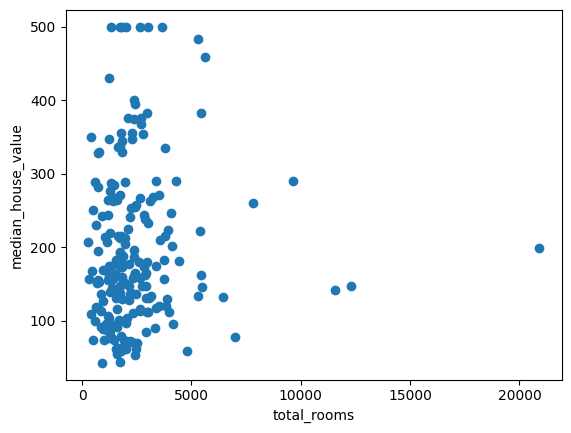

In [117]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based
# solely on total_rooms.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

En vis grad af tilfældighed spiller ind i træningen af en model. Som følge heraf vil du få forskellige resultater hver gang du træner modellen. Med det sagt, givet datamaterialet og hyperparametrene, vil den trænede model generelt gøre en dårlig beskrivelse af forholdet mellem funktionen og labelen.

### Brug modellen til at lave forudsigelser

Du kan bruge den trænede model til at lave forudsigelser. I praksis [bør du lave forudsigelser på eksempler, der ikke er blevet brugt i træning](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data). Dog vil du i denne øvelse blot arbejde med en delmængde af det samme træningsdatamateriale. En senere Colab-øvelse vil udforske måder at lave forudsigelser på eksempler, der ikke er blevet brugt i træning.

Kør først følgende kode for at definere funktionen til boligforudsigelse:

In [104]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

Nu kan du kalde boligforudsigelsesfunktionen på 10 eksempler:

In [105]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             162
 3400     92             183
 3677     69             187
 2202     62             166
 2403     80             169
 5652    295             217
 3318    500             182
 2552    342             171
 1364    118             153
 3468    128             184


### Opgave 2: Vurder modellens forudsigelsesevne

Kig på den foregående tabel. Hvor tæt er den forudsagte værdi på labelværdien? Med andre ord, forudsiger din model nøjagtigt boligværdier?


In [ ]:
#@title Double-click to view the answer.

# Most of the predicted values differ significantly
# from the label value, so the trained model probably
# doesn't have much predictive power. However, the
# first 10 examples might not be representative of
# the rest of the examples.

### Opgave 3: Prøv en anden funktion

Funktionen `total_rooms` havde kun lidt forudsigelsesevne. Ville en anden funktion have større forudsigelsesevne? Prøv at bruge `befolkning` som funktion i stedet for `total_rooms`.

Bemærk: Når du ændrer funktioner, kan det være nødvendigt at ændre hyperparametrene.

Epoch 1/3
142/142 [==============================] - 0s 788us/step - loss: 4050385.0000 - root_mean_squared_error: 2012.5569
Epoch 2/3
142/142 [==============================] - 0s 767us/step - loss: 2902395.7500 - root_mean_squared_error: 1703.6420
Epoch 3/3
142/142 [==============================] - 0s 744us/step - loss: 3293708.2500 - root_mean_squared_error: 1814.8577


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 1) + inhomogeneous part.

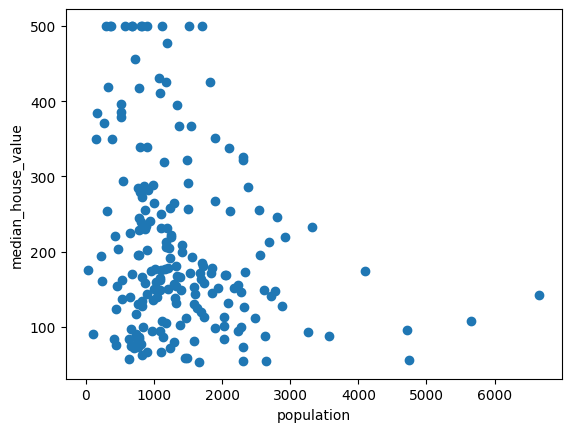

In [107]:
my_feature = "population"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 2
epochs = 3
batch_size = 120

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

Epoch 1/18
5667/5667 [==============================] - 4s 723us/step - loss: 29516.8223 - root_mean_squared_error: 171.8046
Epoch 2/18
5667/5667 [==============================] - 4s 706us/step - loss: 19878.7168 - root_mean_squared_error: 140.9919
Epoch 3/18
5667/5667 [==============================] - 4s 741us/step - loss: 18500.0078 - root_mean_squared_error: 136.0147
Epoch 4/18
5667/5667 [==============================] - 4s 767us/step - loss: 18590.1426 - root_mean_squared_error: 136.3457
Epoch 5/18
5667/5667 [==============================] - 4s 714us/step - loss: 17799.1621 - root_mean_squared_error: 133.4135
Epoch 6/18
5667/5667 [==============================] - 4s 709us/step - loss: 18191.1738 - root_mean_squared_error: 134.8747
Epoch 7/18
5667/5667 [==============================] - 4s 697us/step - loss: 18038.8633 - root_mean_squared_error: 134.3088
Epoch 8/18
5667/5667 [==============================] - 4s 703us/step - loss: 17886.6777 - root_mean_squared_error: 133.7411


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 1) + inhomogeneous part.

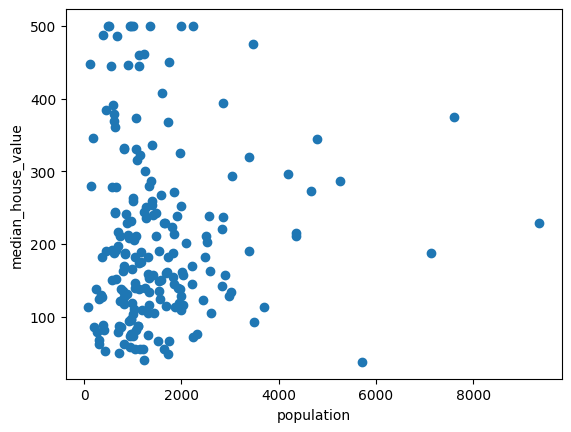

In [116]:
#@title Double-click to view a possible solution.

my_feature = "population" # Pick a feature other than "total_rooms"

# Possibly, experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

Producerede `befolkning` bedre forudsigelser end `total_rooms`?

In [ ]:
#@title Double-click to view the answer.

# Training is not entirely deterministic, but population
# typically converges at a slightly higher RMSE than
# total_rooms.  So, population appears to be about
# the same or slightly worse at making predictions
# than total_rooms.

### Opgave 4: Definér en syntetisk funktion

Du har fundet ud af, at hverken `total_rooms` eller `befolkning` var nyttige funktioner. Med andre ord forudsagde hverken det samlede antal værelser i et kvarter eller kvarterets befolkning med succes den medianboligværdi i det kvarter. Måske kan *forholdet* mellem `total_rooms` og `befolkning` have nogen forudsigelsesevne. Med andre ord, måske er boligtætheden relateret til medianboligværdi.

For at udforske denne hypotese skal du gøre følgende:

1. Opret en [syntetisk funktion](https://developers.google.com/machine-learning/glossary/#synthetic_feature), som er en ratio af `total_rooms` til `befolkning`. (Hvis du er ny inden for pandas DataFrames, så studér venligst [Pandas DataFrame Ultraquick Tutorial](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en).)
2. Finjuster de tre hyperparametre.
3. Afgør, om denne syntetiske funktion producerer en lavere tabværdi end nogen af de enkelte funktioner, du har prøvet tidligere i denne øvelse.


In [ ]:
# Define a synthetic feature named rooms_per_person
training_df["rooms_per_person"] = ? # write your code here.

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = ?
epochs = ?
batch_size = ?

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

In [ ]:
#@title Double-click to view a possible solution to Task 4.

# Define a synthetic feature
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)


Baseret på tabværdierne producerer denne syntetiske funktion en bedre model end de enkelte funktioner, du prøvede i Opgave 2 og Opgave 3. Dog skaber modellen stadig ikke de bedste forudsigelser.


### Opgave 5: Find funktion(er), hvis råværdier korrelerer med labelen

Indtil nu har vi støttet os til forsøg og fejl for at identificere mulige funktioner til modellen. Lad os i stedet stole på statistik.

En **korrelationsmatrix** viser, hvordan hver attributs råværdier forholder sig til de andre attributters råværdier. Korrelationsværdier har følgende betydninger:

  * `1.0`: perfekt positiv korrelation; det vil sige, når én attribut stiger, stiger den anden attribut.
  * `-1.0`: perfekt negativ korrelation; det vil sige, når én attribut stiger, falder den anden attribut.
  * `0.0`: ingen korrelation; de to kolonner [er ikke lineært relaterede](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

Generelt set betyder en højere absolut værdi af en korrelationsværdi, at den har større forudsigelseskraft. For eksempel indebærer en korrelationsværdi på -0,8 langt mere forudsigelseskraft end en korrelation på -0,2.

Den følgende kodecelle genererer korrelationsmatricen for attributter i Californien Boligdatamaterialet:

In [ ]:
# Generate a correlation matrix.
training_df.corr()

Korrelationsmatricen viser ni potentielle funktioner (inklusive en syntetisk funktion) og én label (`median_house_value`). En stærk negativ korrelation eller stærk positiv korrelation med labelen tyder på en potentiel god funktion.

**Din opgave:** Afgør, hvilken af de ni potentielle funktioner der ser ud til at være den bedste kandidat som funktion?

In [ ]:
# Median_indkomst korrelerer 0,7 med labelen
# (median_house_value), så median_indkomst kunne være en
# god funktion. De syv andre potentielle funktioner
# har alle en korrelation relativt tæt på 0.

# Hvis tiden tillader det, kan du prøve median_indkomst som funktion
# og se, om modellen forbedres.

Korrelationsmatricer fortæller ikke hele historien. I senere øvelser vil du finde yderligere måder at udnytte forudsigelsesevne fra potentielle funktioner.

**Bemærk:** Brug af `median_indkomst` som funktion kan rejse visse etiske og retfærdighedsmæssige spørgsmål. Mod slutningen af kurset vil vi udforske etiske og retfærdighedsmæssige spørgsmål.